In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Any long functions can go in a functions.py file, which can be imported
import importlib
import functions
importlib.reload(functions);

In [2]:
# Notes on converting data types:
#  - ZIP-code is better stored as str than as category
#  - following line proves that storing number as float32 does not lose information (on for example distance(mi)),:
#    max(accidents["Distance(mi)"].astype('float64')-accidents["Distance(mi)"].astype('float32'))
#    however, to check this, you have to load the column as float64. values of <10^-5 are returned. This is acceptable
#  - Use .info() and .memory_usage() to view datatypes and memory usage per column

In [3]:
dtype_dict = {'Source':'category','TMC':'category','Severity':'category','Side':'category','City':'category',
              'County':'category','State':'category','State':'category','Country':'category','Timezone':'category',
              'Airport_Code':'category','Wind_Direction':'category','Weather_Condition':'category','Sunrise_Sunset':'category',
              'Civil_Twilight':'category','Nautical_Twilight':'category','Astronomical_Twilight':'category',
              'Start_Lat':'float32','Start_Lng':'float32','End_Lat':'float32','End_Lng':'float32','Distance(mi)':'float32',
              'Number':'float32','Temperature(F)':'float32','Wind_Chill(F)':'float32','Humidity(%)':'float16',
              'Pressure(in)':'float32','Visibility(mi)':'float32','Wind_Speed(mph)':'float32','Precipitation(in)':'float32'}
date_cols = ['Start_Time','End_Time','Weather_Timestamp']
drop_cols = "ID" # drops extra IDs

In [4]:
accidents = pd.read_csv(".\Accidents_Popdensity.csv",index_col=0,dtype=dtype_dict,parse_dates=date_cols).drop(drop_cols,axis=1)

C:\Users\adria\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### View what is in the database

In [5]:
pd.set_option('display.max_columns', None)
display(accidents.head(50))
functions.hide_toggle()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Population_Density
0,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900002,NaN,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,55.17838
1,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900002,NaN,100.0,29.650000,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,880.59690
2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000000,33.299999,100.0,29.670000,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,70.52824
3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.099998,31.000000,96.0,29.639999,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,724.51760
4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000000,33.299999,89.0,29.650000,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,706.93960
5,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,NaN,Westerville Rd,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.900002,35.500000,97.0,29.629999,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1585.89100
6,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,376.0,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.000000,31.000000,100.0,29.660000,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,532.88540
7,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,NaN,N Main St,R,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.000000,31.000000,100.0,29.660000,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1143.50900
8,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,99.0,Notre Dame Ave,L,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.299999,NaN,99.0,29.67000

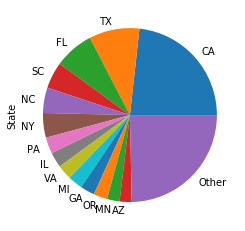

In [36]:
# Pieplot of the US states
cap_state = 0.02
state_counts = accidents["State"].astype(str).value_counts()
state_counts_capped = state_counts[state_counts/state_counts.sum() > cap_state]
state_counts_capped["Other"] = state_counts[state_counts/state_counts.sum() < cap_state].sum()
state_counts_capped.plot.pie()
plt.show()
functions.hide_toggle()

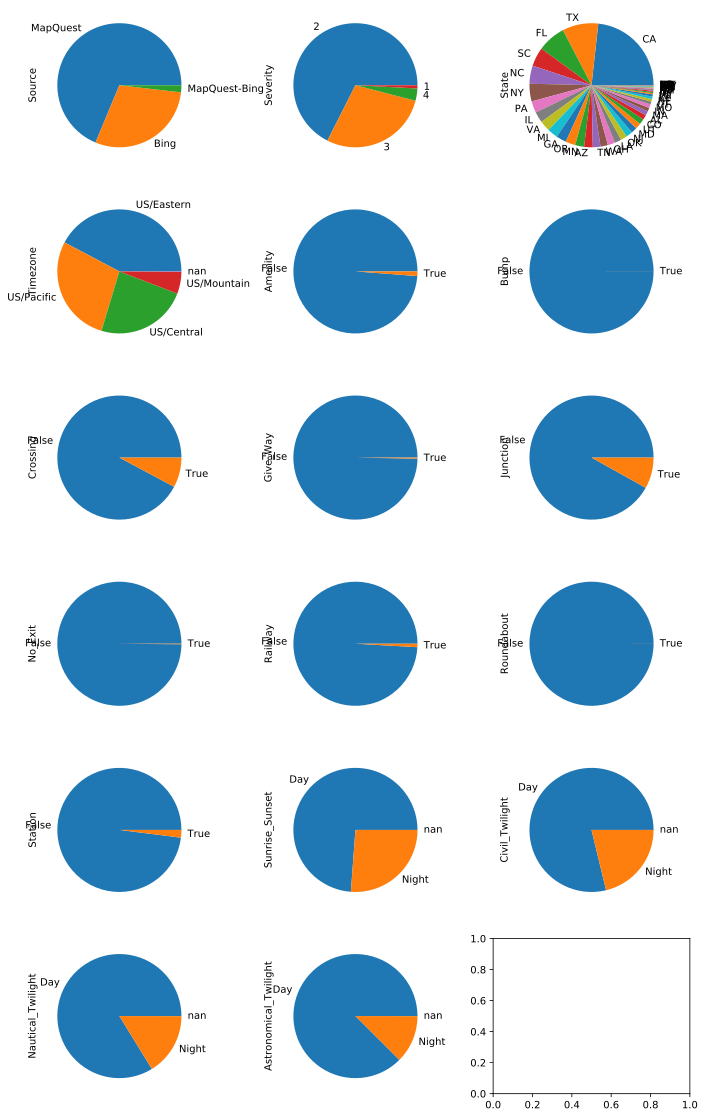

In [38]:
%config InlineBackend.figure_format = 'svg'
fig, axs = plt.subplots(6,3, figsize=(12,20))

cols = np.array([1,3,17,20,32,33,34,35,36,37,38,39,40,45,46,47,48])-1

for i,col in enumerate(accidents.columns[cols]):
    accidents[col].astype(str).value_counts().plot.pie(ax=axs[int(i/3),i%3])

plt.show()
#fig.savefig("./pieplots",dpi=200)
functions.hide_toggle()